# ODE With Birth and Death Process

We follow on from the SIR model of {doc}`unrollSimple` but now include additional
birth and death processes.

$$\begin{aligned}
\frac{dS}{dt} &= -\beta SI + B - \mu S\\
\frac{dI}{dt} &= \beta SI - \gamma I - \mu I\\
\frac{dR}{dt} &= \gamma I
\end{aligned}$$

which consists of two transitions and three birth and death process.

digraph SIR_Model {  
rankdir=LR; size="8" node \[shape = circle\]; S -\> I \[ label = "βSI"
\]; I -\> R \[ label = "γI" \]; B \[height=0 margin=0 shape=plaintext
width=0\]; B -\> S; "S\**2*μ" \[height=0 margin=0 shape=plaintext
width=0\]; S -\> "S\**2*μ"; "I\*μ" \[height=0 margin=0 shape=plaintext
width=0\]; I -\> "I\*μ";

}

Let's define this in terms of ODEs, and unroll it back to the individual
processes.

In [8]:
from pygom import Transition, TransitionType, SimulateOde, common_models

import matplotlib.pyplot as plt

stateList = ['S', 'I', 'R']

paramList = ['beta', 'gamma', 'B', 'mu']

odeList = [Transition(origin='S', equation='-beta*S*I + B - mu*S', transition_type=TransitionType.ODE),
           Transition(origin='I', equation='beta*S*I - gamma*I - mu*I', transition_type=TransitionType.ODE),
           Transition(origin='R', equation='gamma*I', transition_type=TransitionType.ODE)]

ode = SimulateOde(stateList, paramList, ode=odeList)

ode2 = ode.get_unrolled_obj()
ode2.get_transition_matrix()

Matrix([
[0, I*S*beta,       0],
[0,        0, I*gamma],
[0,        0,       0]])

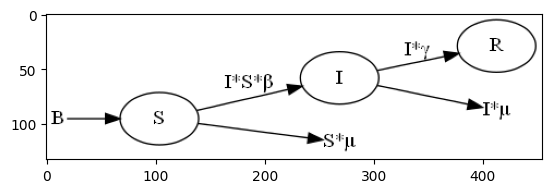

In [6]:
ode2.get_transition_graph()
